## Registration comparision
This compares my ITK code to CIS lddmm code

In [51]:
from ndreg import *
from time import time
import os
import matplotlib.pyplot as plt
%matplotlib inline

First we set the paths

In [52]:
inPath = "in.img"
refPath = "ref.img"
alphaValue = 0.01
cisOutDirPath = "/tmp/cis/"
itkOutDirPath = "/tmp/itk/"

We define a function that runs lddmm using CIS code

In [53]:
def lddmm(inPath, refPath, outDirPath, alpha):
    if not os.path.exists(outDirPath): os.makedirs(outDirPath)
    command = "/cis/home/can/smallprj11/dtipipeline/4_newscripts_c.cis/mm_lddmm2n_ver03.pl 1 {0} {1} 1.0 {2} 1 {3} 4 1 1 1.0".format(inPath, refPath, outDirPath, alpha)
    os.system(command) 
    command = "/cis/home/can/smallprj11/dtipipeline/4_newscripts_c.cis/BIN/IMG_apply_lddmm_tform1 {0} {1} {2} 1".format(inPath, outDirPath+"Hmap000.vtk", outDirPath+os.path.basename(inPath))
    os.system(command)

Now we run the CIS code

In [54]:
start = time()
lddmm(inPath, refPath, cisOutDirPath, alphaValue)
length = time() - start
print("CIS code took {0} s".format(length))

CIS code took 4.14105391502 s


Now we run the ITK code

In [55]:
start = time()
imgMetamorphosis(inPath, refPath, itkOutDirPath, alpha=alphaValue)
length = time() - start
print("ITK code took {0} s".format(length))

ITK code took 673.459858894 s


Read and normalize intensity of 15th slice from deformed

In [68]:
z = 15

cisDeformedInImg = imgRead(cisOutDirPath+os.path.basename(inPath))
cisDeformedInArray = sitk.GetArrayFromImage(cisDeformedInImg).astype(float)
cisDeformedInSlice = cisDeformedInArray[z,:,:]/cisDeformedInArray[z,:,:].max()

itkDeformedInImg = imgRead(itkOutDirPath+os.path.basename(inPath))
itkDeformedInArray = sitk.GetArrayFromImage(itkDeformedInImg).astype(float)
itkDeformedInSlice = itkDeformedInArray[z,:,:]/itkDeformedInArray[z,:,:].max()

CIS Deformed Slice

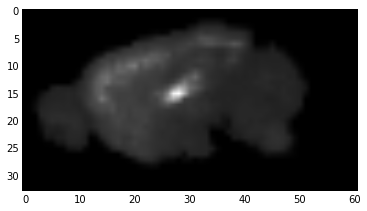

In [69]:
plt.imshow(cisDeformedInSlice, cmap = "gray")

ITK Deformed Slice

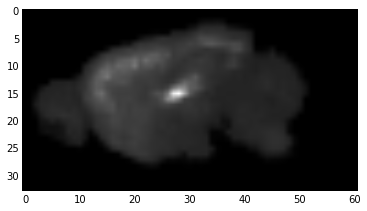

In [70]:
plt.imshow(itkDeformedInSlice, cmap = "gray")

Difference between slices

In [72]:
difference = cisDeformedInSlice - itkDeformedInSlice

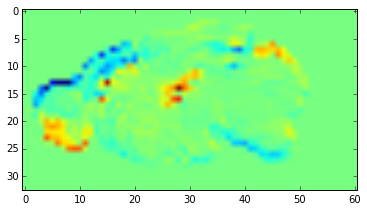

In [75]:
plt.imshow(difference)